C:\Users\mpm51\AppData\Local\Temp\ipykernel_17004\2662106415.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.drop(['전출지별'], axis=1, inplace=True)
C:\Users\mpm51\AppData\Local\Temp\ipykernel_17004\2662106415.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True)


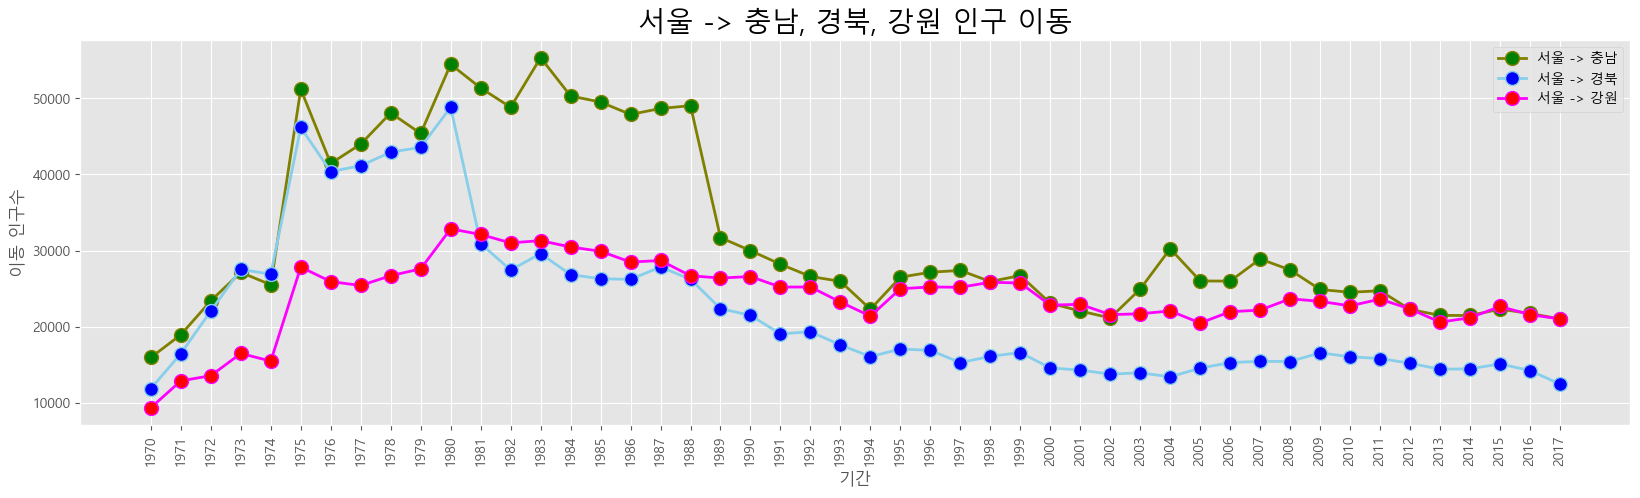

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_path = './data/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

df = df.ffill()

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul.drop(['전출지별'], axis=1, inplace=True)
df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데인터 값만 선택
sr_one = df_seoul.loc['경기도']

## 서울에서 '충청남도','경상북도','강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도','경상북도','강원도'], col_years]

# 스타일 서식 지정, ggplot은 스타일 이름
plt.style.use('ggplot')

# 그림 사이즈 늘리기
fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(1,1,1) # 행의 크기, 열의 크기, 서브플롯 순서

# axe 객체에 plot 함수로 그래프 출력
ax.plot(col_years, df_3.loc['충청남도',:], marker = 'o', markerfacecolor = 'green', 
        markersize = 10, color = 'olive', linewidth = 2, label = "서울 -> 충남")

ax.plot(col_years, df_3.loc['경상북도',:], marker = 'o', markerfacecolor = 'blue', 
        markersize = 10, color = 'skyblue', linewidth = 2, label = "서울 -> 경북")

ax.plot(col_years, df_3.loc['강원도',:], marker = 'o', markerfacecolor = 'red', 
        markersize = 10, color = 'magenta', linewidth = 2, label = "서울 -> 강원")

ax.legend(loc = 'best')

# 차트 제목 추가
ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size = 20)

# 축 이름 추가
ax.set_xlabel('기간', size = 12)
ax.set_ylabel('이동 인구수', size = 12)

# 축 눈금 위치 지정
ax.set_xticks(range(len(col_years)))

# 축 눈금 레이블 지정 및 75도 회전
ax.set_xticklabels(col_years, rotation = 90)

# 축 눈금 레이블 크기
ax.tick_params(axis = 'x', labelsize = 10)
ax.tick_params(axis = 'y', labelsize = 10)

plt.show()

In [ ]:
# 이처럼 같은 Axes 객체에 그래프 여러 개를 동시에 표시할 수 있다
# 서울에서 서로 다른 3개 지역으로 빠져나간 인구 이동을 비교 파악하기가 쉽다
# 지리적으로 가까운 충남지역으로 이동한 인구가 다른 두 지역에 비해 많은 편이다
# 전반적으로 70 ~ 80 년대에는 서울에서 지방으로 전출하는 인구가 많았으나
# 1990년대 이후로는 줄곧 감소하는 패턴을 보임